# Machine Learning Day 1
## Tensorflow Workshop 1

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
#creat a tensorflow graph
g = tf.get_default_graph()

In [4]:
tf.reset_default_graph()
g = tf.get_default_graph()
X = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
W = tf.Variable(tf.truncated_normal([784,100], stddev = 0.1))
b = tf.Variable(tf.truncated_normal([100], stddev = 0.1))
latentscores = tf.nn.relu(tf.matmul(X,W) + b)

W2 = tf.Variable(tf.truncated_normal([100,10], stddev = 0.1))
b2 = tf.Variable(tf.truncated_normal([10], stddev = 0.1))
scores = tf.add(tf.matmul(latentscores, W2), b2)


loss = tf.nn.softmax_cross_entropy_with_logits(logits=scores,
                                              labels = y)
avg_loss = tf.reduce_mean(loss)
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(avg_loss)

init_all = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [5]:
sess = tf.Session()

In [6]:
sess.run(init_all)

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
sess.run(scores, feed_dict={X: mnist.train.images[0:100],
                      y: mnist.train.labels[0:100]})

array([[-6.26259625e-01,  2.47660413e-01, -1.08843732e+00,
         1.51216835e-02,  5.16627371e-01,  1.87106967e-01,
        -5.94032466e-01, -1.01652533e-01, -5.30635566e-03,
         4.76711355e-02],
       [-4.92384821e-01,  3.09858263e-01, -2.77898788e-01,
         1.23903081e-01, -2.78059036e-01,  8.43599737e-01,
        -6.58793867e-01, -5.84938705e-01, -7.79423654e-01,
         8.56670797e-01],
       [-7.36287773e-01,  7.20512450e-01, -7.87681758e-01,
         6.52424753e-01,  3.49920720e-01,  2.93840438e-01,
        -8.79807174e-01, -1.64259210e-01, -3.98734748e-01,
         9.25097108e-01],
       [-1.22904539e-01,  2.37254634e-01, -5.23530841e-01,
         2.41737992e-01,  2.85502940e-01,  6.41710281e-01,
        -6.94039881e-01, -9.13605839e-03, -2.95947284e-01,
         4.85677034e-01],
       [-1.00843534e-01,  2.94631839e-01, -1.11321911e-01,
        -5.00599861e-01,  5.15735507e-01,  3.12229931e-01,
        -2.93206304e-01, -1.57162562e-01, -4.56639007e-02,
         9.

In [9]:
#Do one step of gradient descent
sess.run(train_step, feed_dict={X: mnist.train.images[0:100],
                      y: mnist.train.labels[0:100]})

In [10]:
sess.run(avg_loss, feed_dict={X: mnist.train.images[0:100],
                      y: mnist.train.labels[0:100]})

2.4323266

In [1]:
from tqdm import trange         
for iter in trange(50):
#runs 550 iterations of the training
    for i in range(550):
        batch_xs = mnist.train.images[i*100:(i+1)*100]
        batch_ys = mnist.train.labels[i*100:(i+1)*100]
        sess.run(train_step, feed_dict={X: batch_xs,
                          y: batch_ys})

ModuleNotFoundError: No module named 'tqdm'

In [19]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(scores, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test accuracy: {0}'.format(sess.run(accuracy, feed_dict={X: mnist.test.images, y: mnist.test.labels})))

Test accuracy: 0.97079998254776


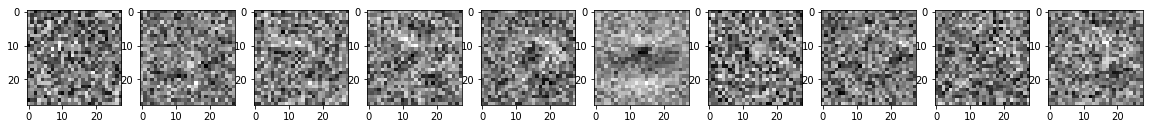

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
# Get weights
weights = sess.run(W)

fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for digit in range(10):
    ax[digit].imshow(weights[:,digit].reshape(28,28), cmap='gray')